<a href="https://colab.research.google.com/github/sensewake/Colab.ipynb/blob/main/Colab3%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 전처리과정 start

In [ ]:
import pandas as pd
sparta_data = pd.read_table('/content/access_detail.csv', sep=',')
sparta_data.head()

,lecture_id,access_date,user_id
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34,78ff837c7cea9f33
1,5f266927e67b8fcf4340c087,2020-08-04 11:56:07,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c087,2020-08-03 12:19:58,23182525e9996864
3,5f266927e67b8fcf4340c087,2020-08-08 15:15:16,ffb6913842d617a5
4,5f266927e67b8fcf4340c087,2020-08-04 10:30:59,2c6822e7e833dc95


In [ ]:
print(type('Hell0!'))

<class 'str'>


In [ ]:
print(type(sparta_data['access_date'][1]))

<class 'str'>


In [ ]:
format='%Y-%m-%dT%H:%M:%S.%f'
sparta_data['access_date_time'] = pd.to_datetime(sparta_data['access_date'], format=format) 
#sparta_data.tail(5)

In [ ]:
print(type(sparta_data['access_date'][0]))

<class 'str'>


In [ ]:
sparta_data['access_date_time_weekday'] = sparta_data['access_date_time'].dt.day_name() 
#sparta_data.tail(5)

In [ ]:
sparta_data['access_date_time_hour'] = sparta_data['access_date_time'].dt.hour
#sparta_data.tail(5)
# 전처리 end

In [ ]:
# 분석
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = sparta_data.groupby('access_date_time_weekday')['user_id'].count()
weekdata

access_date_time_weekday
Friday        859
Monday       1354
Saturday      926
Sunday       1541
Thursday      937
Tuesday      1624
Wednesday     887
Name: user_id, dtype: int64

In [ ]:
#week의 리스트에 따라 데이터들을 다시한번 재배열 할수 있어요!
hourdata = sparta_data.groupby('access_date_time_hour')['user_id'].count()
#hourdata = hourdata.sort_index() 
hourdata = hourdata.sort_index(ascending=False)
#hourdata = hourdata.sort_index(ascending=True) 
hourdata

access_date_time_hour
23     426
22     580
21     581
20     517
19     445
18    1115
17     471
16     523
15     477
14     387
13     361
12     259
11     279
10     297
9      216
8      126
7       84
6       62
5       50
4       65
3      123
2      144
1      197
0      343
Name: user_id, dtype: int64

In [ ]:
# 분석 및 시각화 
# 한글깨짐 해결 : 아래 주석 3줄을 실행 후 런타임 재실행을 한 후 코드 재실행을 하면 한글이 적용된다.

In [ ]:
"""
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
"""

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [ ]:
# 한글깨짐1
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


In [ ]:
# 한글깨짐2

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

plt.rc('font', family='NanumBarunGothic')

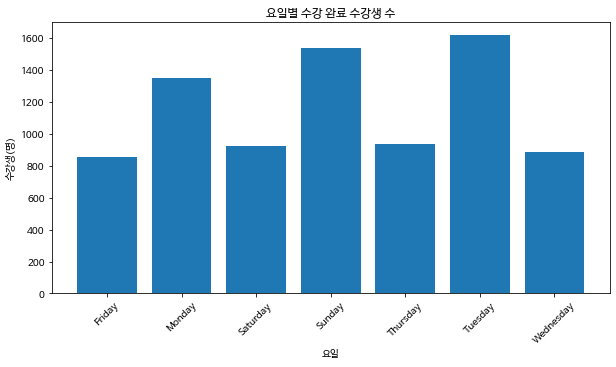

In [ ]:
#그래프 사이즈
plt.figure(figsize=(10,5)) 
#그래프 x축 y축
plt.bar(weekdata.index, weekdata) 
#그래프 명
plt.title('요일별 수강 완료 수강생 수') 
#그래프 x축 레이블
plt.xlabel('요일')
#그래프 y축 레이블
plt.ylabel('수강생(명)') 
#x축 레이블을 90도로 변환
#plt.xticks(rotation=0) # 가로
plt.xticks(rotation=45) 
#plt.xticks(rotation=90)  # 세로
#그래프 출력
plt.show()

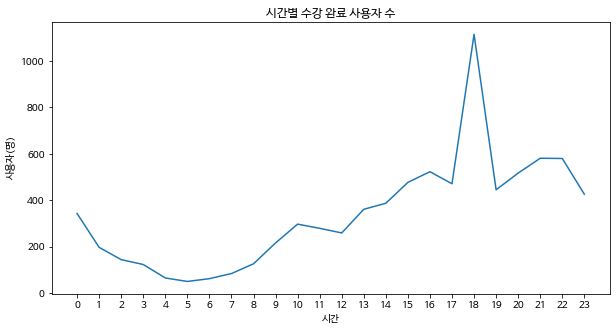

In [ ]:
#그래프 사이즈 변경
plt.figure(figsize=(10,5)) 
#그래프 x축 y축
plt.plot(hourdata.index, hourdata) 
#그래프 명
plt.title('시간별 수강 완료 사용자 수') 
#그래프 x축 레이블
plt.xlabel('시간')
#그래프 y축 레이블
plt.ylabel('사용자(명)') 
#x축 눈금 표시 하기
plt.xticks(np.arange(24)) 
#그래프 출력
plt.show()

In [ ]:
#피벗테이블 만들기
#values : 열에 들어 가는 부분
#index : 행에 들어가는 부분
#aggfunc : 데이터 축약시 사용할 함수
sparta_data_pivot_table = pd.pivot_table(sparta_data, values='user_id',
index=['access_date_time_weekday'], 
columns=['access_date_time_hour'], 
aggfunc="count").agg(weeks)
sparta_data_pivot_table

access_date_time_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,67,31,30,27,3,5,19,14,28,22,...,62,55,101,84,68,86,119,117,118,86
Tuesday,51,27,17,12,6,3,6,14,20,26,...,41,56,68,34,713,56,66,97,92,86
Wednesday,47,19,12,8,10,15,14,3,22,20,...,34,68,40,68,80,71,56,75,82,52
Thursday,39,30,10,15,14,2,5,11,10,18,...,46,69,80,60,61,61,70,62,94,65
Friday,72,36,20,9,5,1,5,2,10,34,...,44,61,57,70,67,51,45,45,47,33
Saturday,31,17,10,22,7,4,4,19,9,51,...,72,78,66,82,55,26,47,70,52,37
Sunday,36,37,45,30,20,20,9,21,27,45,...,88,90,111,73,71,94,114,115,95,67


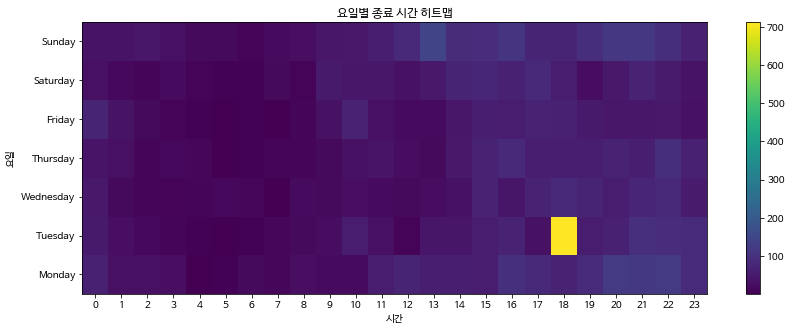

In [ ]:
#그래프 사이즈 변경
plt.figure(figsize=(14,5))
#pcolor를 이용하여 heatmap 그리기
plt.pcolor(sparta_data_pivot_table) 
#히트맵에서의 x축
plt.xticks(np.arange(0.5, len(sparta_data_pivot_table.columns), 1), sparta_data_pivot_table.columns) 
#히트맵에서의 y축
plt.yticks(np.arange(0.5, len(sparta_data_pivot_table.index), 1), sparta_data_pivot_table.index) 
#그래프 명
plt.title('요일별 종료 시간 히트맵') 
#그래프 x축 레이블
plt.xlabel('시간') 
#그래프 y축 레이블
plt.ylabel('요일')
#plt.colorbar() 명령어를 추가하면 그래프 옆에 숫자별 색상값을 나타내는 컬러바를 보여 줍니다 
plt.colorbar()
plt.show()

In [ ]:
np.arange(1,100,3) # 1~100 3간격으로 표시하기

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])